# Table of Contents
* [Introduction](#Introduction)

* [Data Preparation](#Data-Preparation)

    *[Import dataset](#Import-Dataset) 
    
    *[Data Cleaning](#Data-Cleaning)
    
* [Data Questions](#Data-Questions)

* [Data Story](#Data-Story)
    
* [Inferential Statistics](#Inferential-Statistics)


# Introduction

Recently, we saw more and more news articles discussing the impact of internet review scores on the sales of video games like [this one]( https://www.dailydot.com/parsec/metacritic-scores-game-sales-gdc-2015/)  We have also seen reports like ['Former IGN employee admits review scores are skewed due to public relations'](https://www.zeldadungeon.net/former-ign-employee-admits-review-scores-are-skewed-due-to-public-relations/). It seems that review scores really matter to the video sales from these news articles...and some video game publishers really believe that to go extra miles to influence the critic review scores.

However, I want to use my data science skills to see if Internet video games scores really have some kind of impact on game sales. With the aid of an [awesome dataset](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/) from kaggle by Rush Kirubi that includes the names of games released from 1980-2016, their sales in different regions (North America, Europe, Japan, and other regions), and their critic review scores and user review scores scraped from Metacritic, I hope to see if [review scores are really hurting video games](https://kotaku.com/metacritic-matters-how-review-scores-hurt-video-games-472462218). If they do, how much influence do they have? And when did this trend start?

Let's dig into it.


# Data Preparation

## Import Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
#load data
df=pd.read_csv('data/Video_Games_Sales_as_at_22_Dec_2016.csv')

#examine the dataset
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Data Cleaning
### Dealing with User_Score datatype
From the previous inspection, it looks like 'User_Score' column is 'object' type, which seemed to be weird considering it was supposed to be all numbers


In [4]:
df.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

It looks like 'User_Score' column has string 'tbd' in it. I decide to treat it as NA as convert it to numeric type

In [5]:
df['User_Score']=pd.to_numeric(df['User_Score'],errors='coerce')

### Missing Review scores
About half of the dataset doesn't have a critic nor a user score, which is the critical element for my analysis, are they all old games before the prevalence of internet and online review scores?

To find this out, I will compute the percentages of games that did not have critic scores of each year, and plot it with a bar chart

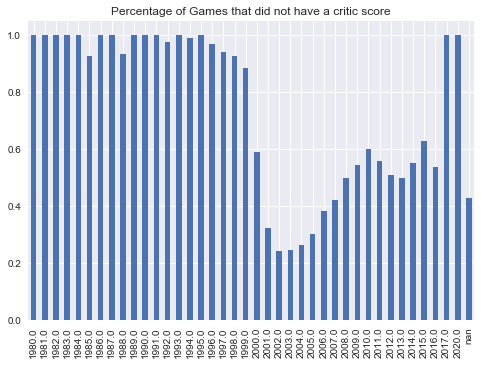

In [6]:
# Plot the percentage of games that did not have a critic score from each year
dfna=df.loc[df['Critic_Score'].isnull()]

nayear=dfna['Year_of_Release'].value_counts(dropna=False).sort_index()
year=df['Year_of_Release'].value_counts(dropna=False).sort_index()
years=pd.DataFrame({'NA':nayear,'ALL': year})
years['NApct']=years['NA']/years['ALL']

years.NApct.plot(kind='bar',title="Percentage of Games that did not have a critic score")
plt.show()


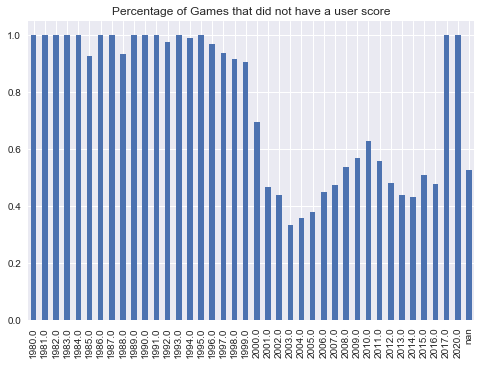

In [7]:
dfna2=df.loc[df['User_Score'].isnull()]

nayear=dfna2['Year_of_Release'].value_counts(dropna=False).sort_index()
year=df['Year_of_Release'].value_counts(dropna=False).sort_index()
years=pd.DataFrame({'NA':nayear,'ALL': year})
years['NApct']=years['NA']/years['ALL']

years.NApct.plot(kind='bar',title="Percentage of Games that did not have a user score")
plt.show()


It's pretty clear from the charts that most games that came out before 2000 did not have a critic score or a user_score, which coincided with the the incredible growth of the Internet since 2000. 

Also, it seemed that the dataset did not quite get updated with the game releases after 2016. 

So this analysis is mainly focused on the games with critic scores AND user scores from 2000 to 2016.

In [8]:
#Filter the dataset: only keeping rows with both Critic_Score and User_Score, with release date between 2000-2016
newdf=df.loc[df['Critic_Score'].notnull()]
newdf=newdf.loc[newdf['User_Score'].notnull()]
newdf=newdf[(newdf.Year_of_Release<2017) & (newdf.Year_of_Release>1999)]
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6812 entries, 0 to 16709
Data columns (total 16 columns):
Name               6812 non-null object
Platform           6812 non-null object
Year_of_Release    6812 non-null float64
Genre              6812 non-null object
Publisher          6811 non-null object
NA_Sales           6812 non-null float64
EU_Sales           6812 non-null float64
JP_Sales           6812 non-null float64
Other_Sales        6812 non-null float64
Global_Sales       6812 non-null float64
Critic_Score       6812 non-null float64
Critic_Count       6812 non-null float64
User_Score         6812 non-null float64
User_Count         6812 non-null float64
Developer          6808 non-null object
Rating             6747 non-null object
dtypes: float64(10), object(6)
memory usage: 904.7+ KB


### Normalizing User_scores
It looks like User_Scores are plotted on a scale of 0-10 while Critic_Score is plotted on 0-100, let's put them on the same scale by multiplying User_Scores by 100

### Create a new column "NonNA_Sales"
it indicates the total sales outside of the US.

The reason I need this column is that metacritic is a US_based website and US visitors made up 36% traffic of the website, more than any other country in the world (UK has the second most visitors, but they only made up 7% of web traffic), I want to see if reviews scores from metacritic would affect the NA_sales and NonNA_Sales equally.

In [9]:
newdf['NonNA_Sales']=newdf['Global_Sales']-newdf['NA_Sales']

In [10]:
newdf.User_Score=newdf.User_Score.values*10

### Create a column "Exclusivity" 
It indicates if a game is multi-platform or console exclusive.

A multi-platform game is a game that was released on more than one platform. An exclusive game is a game that was released on only one platform.

1 in Exclusivity column indicates a console exclusive game, 0 indicates multi-platform games 

In [11]:
#generate two lists of games:
#multiplat are the multi-platform games
#exclusive are console exclusive games
namevaluecount=newdf['Name'].value_counts(dropna=False).sort_index()
multiplat=namevaluecount[namevaluecount>1]
exclusive=namevaluecount[namevaluecount<=1]
multiplat=list(multiplat.index)
exclusive=list(exclusive.index)

Exclusivity=[]
for index, row in newdf.iterrows():
    if row['Name'] in multiplat:
        Exclusivity.append(0)
    if row['Name'] in exclusive:
        Exclusivity.append(1)

#Create a new column in dataframe indicates whether the game is exclusive or not
newdf['Exclusivity']=Exclusivity



In [12]:
newdf.head(50)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,NonNA_Sales,Exclusivity
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E,41.17,1
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E,19.84,1
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E,17.16,1
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E,18.52,1
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E,14.96,1
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,84.0,594.0,Nintendo,E,13.88,1
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,86.0,464.0,Nintendo,E,13.50,1
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,77.0,146.0,Nintendo,E,13.78,1
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,63.0,106.0,Good Science Studio,E,6.81,1
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,74.0,52.0,Nintendo,E,12.78,1


# Data Questions
## 1. Did the game review score shift overtime?
I want to see if the critics' and users' opinions on game qualities differ for games released in each year.
To find out this question, I will plot a time series of the mean Critic_score and User_score

In [13]:
# Group df by 'Year_of_Release': by_year
by_year = newdf.groupby('Year_of_Release')

# Select 'age' and 'fare'
by_year_sub = by_year[['Critic_Score','User_Score']]

# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_year_sub.agg(['mean'])



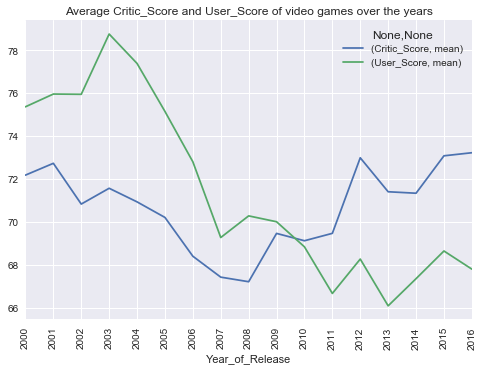

In [14]:
aggregated.plot(title='Average Critic_Score and User_Score of video games over the years')
plt.xticks(aggregated.index,rotation=90)
plt.show()

From the plot, we can see that:

1. both average critic scores and user scores hit a high point for games that came out in 2003, and both kept declining until 2007

2. For the games that came out before 2010, mean user scores are generally higher than mean critic score, however, it went the other way for game that came out in 2010 to 2016

3. The average critic score was in an upward trend since 2010, while user score kind of swing between 66-69 since 2010

## 2. Did the number of reviews for each game change over the years?

It looks like Critic_Score are becoming a more important indicator for the games that were released after 2010...while the User_Score are becoming less important. I was wondering if the average number of reviewer for each game has changed as well.


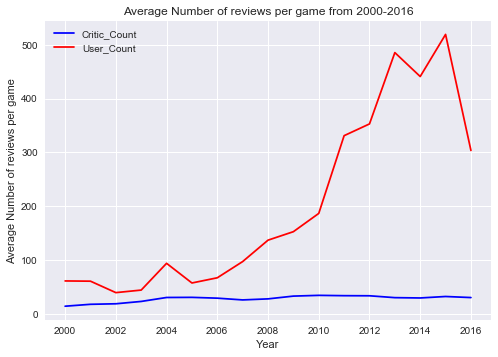

In [15]:
# Group df by 'Year_of_Release': by_year
by_year = newdf.groupby('Year_of_Release')

# Select 'age' and 'fare'
by_year_sub = by_year[['Critic_Count','User_Count']]

# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_year_sub.agg(['mean'])
#display(aggregated)


plt.plot(aggregated.iloc[:,0], color='blue', label='Critic_Count')
plt.plot(aggregated.iloc[:,1], color='red', label='User_Count')
plt.legend()

plt.xlabel('Year')
plt.ylabel('Average Number of reviews per game')
plt.title('Average Number of reviews per game from 2000-2016')
plt.show()

# plt.show()

It looks like the number of critics who reviewed each game remained consistent over the years when comparing to the drastic increase of number of users that reviewed the games...the increase of User_Count from 2010-2012 is especially outstanding.

## 3. Are games selling better each year?
To answer this question, I plotted the mean sale figures of each video game of each year on a time series. The reason I chose mean sales of each game instead of sum sales of all video games of each year is that some years might have seen more major game releases than the other years, so the total sale numbers might simple being attributed to the number of releases alone.

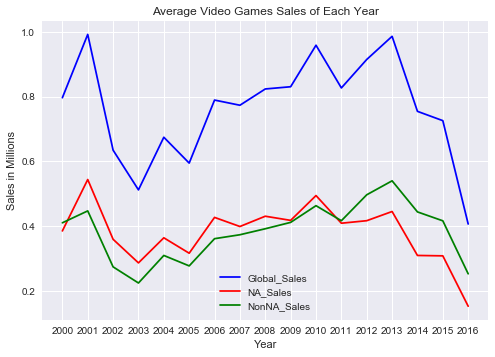

In [16]:
#Average Video Games Sales of Each Year Plot
agg=newdf.groupby('Year_of_Release')
plt.plot(agg['Global_Sales'].mean(), color='blue', label='Global_Sales')
plt.plot(agg['NA_Sales'].mean(), color='red', label='NA_Sales')
plt.plot(agg['NonNA_Sales'].mean(), color='green', label='NonNA_Sales')
plt.xticks(agg['Global_Sales'].mean().index)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sales in Millions')
plt.title('Average Video Games Sales of Each Year')
plt.show()

This plot demonstrates that the non NA market started to buy more games released after 2010 than the NA market. Non_NA consumers are more interested in the games that came out after 2010 than the NA Consumers

## 4. Are review scores and game sales correlated?

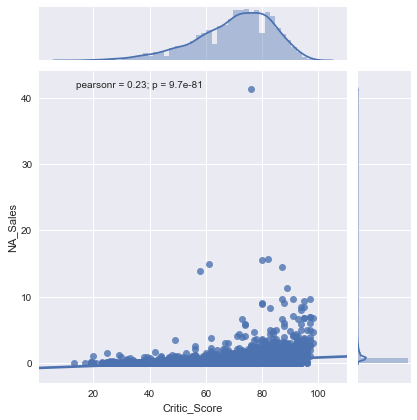

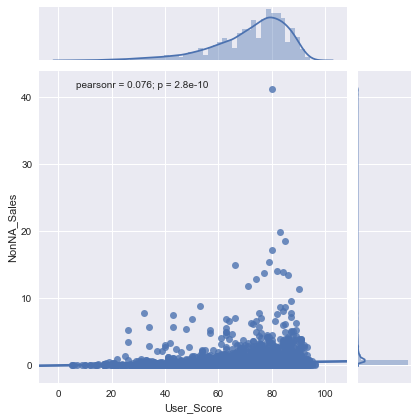

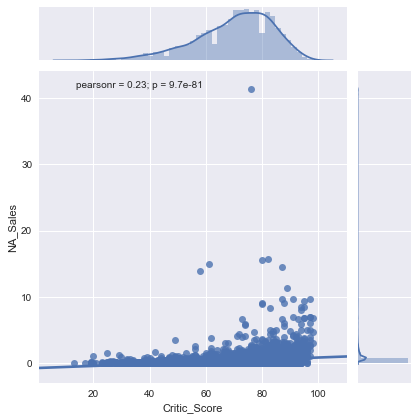

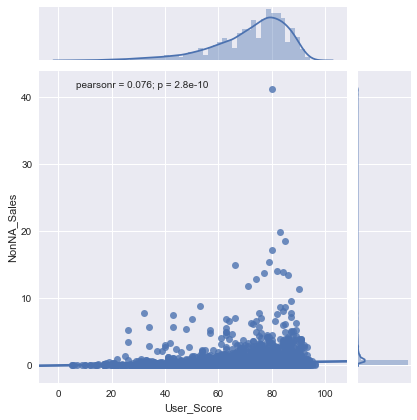

In [17]:
sns.jointplot(data=newdf, x='Critic_Score', y='NA_Sales', kind='reg')
sns.jointplot(data=newdf, x='User_Score', y='NonNA_Sales', kind='reg')
sns.jointplot(data=newdf, x='Critic_Score', y='NA_Sales', kind='reg')
sns.jointplot(data=newdf, x='User_Score', y='NonNA_Sales', kind='reg')
plt.show()

From these plots we couldn't tell much about the correlation since the R-square score is low for all the correlations I'm trying to see, only thing we can tell is:

Critic_Score is more correlated with game sales on for both NA region and non-NA regions than User_Score for games released from 2000-2016. 

# Data Story

I am interested to see if the US based video game review aggregator website Metacritic's review score from both the critics and the user have impact on the game sale of both North America region and non-North America Region. So far my observations tell me that:

Both critic_score and user_score are positively correlated with the game sales of both NA and NonNA regions, however, 
a game's critic_score is more correlated with its sales than a game's user score. Although that correlation is still pretty low.

For reviews scores: the games that came out before 2010, average user_score are generally higher than average Critic_score, however, it went the other way for game that came out in 2010 to 2016. 

For video game sales: The Non_NA market bought more games that are released after 2010 than the NA market, as the average games sales are higher in Non_NA regions for the games that came out after 2010. So it seems that Non_NA consumers are more interested in the games that came out in recent years than the NA consumers. Maybe the foreign game market expanded while US game market shrank.

These observations make me wonder if the user_score decline for the games released after 2009 has something to do with the declining sales of video games that came out after 2010 in the NA? Because 2009 and 2010 are pretty close with each other, and since 2010, average user_score became lower than average critic_score each year and NA_Sales became lower than NonNA_Sales each year.

From these observations that, I hypothesize that:
1. Critic_score is more closely correlated with the game sales in NA before 2010 than after 2010.
2. User_score is more closely correlated with the game sales in NA after 2010 than before 2010.
3. Critic_score is more closely correlated with the game sales in Non_NA than in NA after 2010.
4. User_score is more closely correlated with the game sales in NA than in Non_NA after 2010.


I also want to find out these if time permits:
1. Console exclusive games have better user_score and critic score than the multi-platform games in the recent years due to "fanboyism"?

I will try to investigate more in the next update with inferential statistics skills.

# Inferential Statistics

## Are post_2010 User_Scores really lower than post_2010 Critic_Scores?

In [19]:
from scipy.stats import ttest_ind
#subset the dataset for pre2010 (2000-2009) and post2010 (2010-2017)
pre2010=newdf.loc[newdf.Year_of_Release<2010]
post2010=newdf.loc[newdf.Year_of_Release>=2010]

a=post2010.User_Score.values
b=post2010.Critic_Score.values
print(ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate'))

Ttest_indResult(statistic=-8.2630977375844648, pvalue=1.8606239402935275e-16)


The p-value is really low..which indicates that Average User_Score for the games that were released after 2010 are really lower than their Critic_Score.

## Are there variables that are particularly significant in terms of explaining the video games sales in different regions?

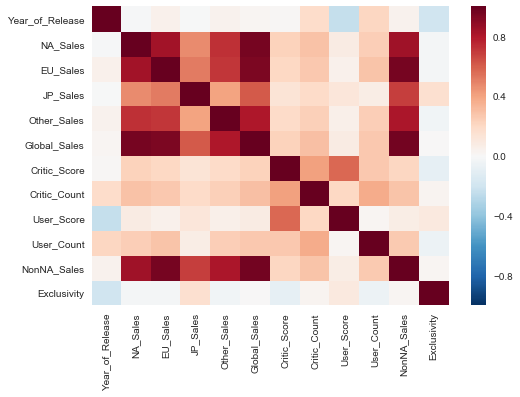

In [20]:
#make a correlation matrix
corr=newdf.corr()
#make a heatmap
sns.heatmap(corr)
plt.show()

From the above graph, we can see that, for games released between 2000 to 2016, :
1. Despite the fact that Critic_Score is a better indicator than User_Score, a game's Critic_Score and User_Score didn't have much to do with the games' sales.
2. A game's exclusiveness didn't do much to drive sales either...besides a slight positive correlation with Japanese market
3. Continue the talk about Japanese market, it looks like critic scores don't matter as much for Japanese market when comparing to other regions. Interestingly, user scores matter more for Japanese market than other countries.
4. A game's total sale numbers are mostly driven by NA_sales and EU_sales...and JP_Sales didn't correlate as strongly as NA_Sales and EU_Sales for Global_Sales...so we can say a game that sells well in NA and EU are likely to sell great on a global scale.
5. User_Score is negatively correlated with Year_of_Release...this is consistent with our previous plot 'Average Critic_Score and User_Score of video games over the years' as we see User_Score is declining every year...on the other hand Critic_Score remained consistent over the years.

## Pre-2010 (2000-2009) vs. post-2010 (2010-2016)
Now we have talked about the interesting shift about our data before and after the year 2010, let's examine it more closely:
1. Critic_score is more closely correlated with the game sales in NA before 2010 than after 2010.
2. User_score is more closely correlated with the game sales in NA after 2010 than before 2010.
3. Critic_score is more closely correlated with the game sales in Non_NA than in NA after 2010.
4. User_score is more closely correlated with the game sales in NA than in Non_NA after 2010.

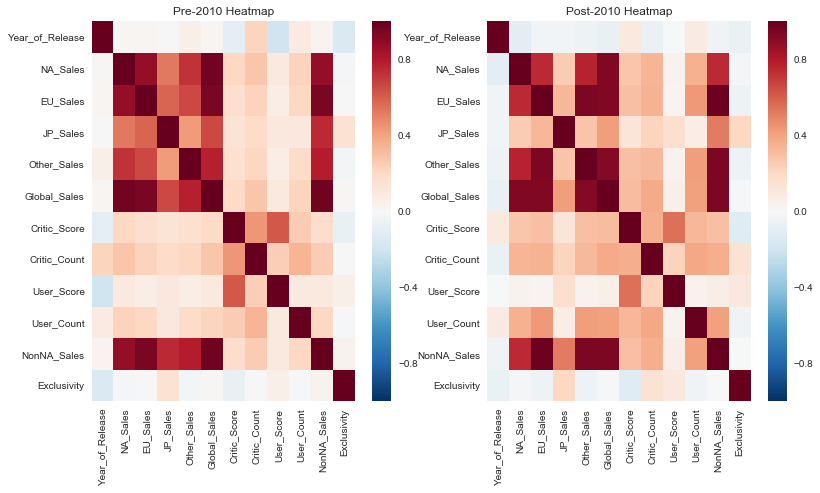

In [21]:
plt.figure(figsize=(13, 7)) 

plt.subplot(1, 2, 1)
corr1=pre2010.corr()
sns.heatmap(corr1)
plt.title("Pre-2010 Heatmap")

plt.subplot(1, 2, 2)
corr2=post2010.corr()
sns.heatmap(corr2)
plt.title("Post-2010 Heatmap")
plt.show()

From the heatmaps, we can see that:
1. Critic_Score is more correlated with a game's sale in NA market, EU market, and other markets besides Japanese market for the games that were released after 2010 than those games that were released before 2010. The correlation between Critic_Score and EU market is the strongest among them.
2. User_Score became even worse predictor for post-2010 game sales comparing to pre-2010 games, except for post-2010 game's JP_Sales: for post-2010 games the User_Score is slightly positively correlated with JP_Sales.
3. Global Sales is correlated strongly by NA_Sales and EU_Sales while not being so much with JP_Sales...as a matter of fact JP_Sales becomes a weaker indicator for Global_Sales after 2010.
4. It looks like the number of user reviews are positively correlated with game sales in all Non-JP regions...

## Initial Findings
1. More users are paying attention to reviews on Metacritics in recent years (2010 and on)
    i. On one hand, the non-Japanese users take critics' scores more into consideration when deciding buying a game or not
    ii. On the other hand, much more users started to post reviews on Metacritics since 2010, which might be the cause of the declining relevance between Metacritics user scores and game sales.

**So Critic_Score matters for the game sales non-JP market, while the User_Score does not.**
 
2. Critics scores are better indicators for sales in Non_JP regions than JP for post-2010 games, and a game that sold well in other regions didn't necessarily sell well in Japan, **so we might need to use different marketing strategies for Japan**.


## Machine Learning

## Linear Regression
### Questions: What if two features are related (not independent)


In [22]:
# Select which features to use for linear regression model
# F-score is a measure of individual feature effect on the dependent variable
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import SelectPercentile

corr2=post2010.corr()
post2010dummy=pd.get_dummies(post2010,columns=['Platform', 'Genre', 'Rating'])
#print(pd.DataFrame(post2010dummy.columns))
X=post2010dummy.iloc[:,[1,8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,43]]
#dependent variable: non-JP sales
y=post2010dummy['Global_Sales'].values-post2010dummy['JP_Sales'].values

Selector_f = SelectPercentile(f_regression, percentile=10)
Selector_f.fit(X,y)
for n,s in zip(X.columns,Selector_f.scores_):
     print ('F-score: %3.2f for feature %s ' % (s,n))


F-score: 12.97 for feature Year_of_Release 
F-score: 232.03 for feature Critic_Score 
F-score: 338.44 for feature Critic_Count 
F-score: 3.17 for feature User_Score 
F-score: 468.37 for feature User_Count 
F-score: 3.36 for feature Exclusivity 
F-score: 2.53 for feature Platform_3DS 
F-score: 0.99 for feature Platform_DS 
F-score: 35.56 for feature Platform_PC 
F-score: 0.01 for feature Platform_PS2 
F-score: 7.54 for feature Platform_PS3 
F-score: 3.67 for feature Platform_PS4 
F-score: 5.51 for feature Platform_PSP 
F-score: 16.78 for feature Platform_PSV 
F-score: 3.93 for feature Platform_Wii 
F-score: 0.72 for feature Platform_WiiU 
F-score: 25.52 for feature Platform_X360 
F-score: 0.04 for feature Platform_XOne 
F-score: 1.44 for feature Genre_Action 
F-score: 9.00 for feature Genre_Adventure 
F-score: 6.11 for feature Genre_Fighting 
F-score: 2.32 for feature Genre_Misc 
F-score: 0.74 for feature Genre_Platform 
F-score: 1.19 for feature Genre_Puzzle 
F-score: 0.70 for feature 

In [107]:
#build a linear regression model
# Select which features to use for linear regression model
# F-score is a measure of individual feature effect on the dependent variable
from sklearn.linear_model import LinearRegression 

post2010['NonJP_Sales']=post2010['Global_Sales']-post2010['JP_Sales']
post2010=post2010.fillna('NA')


#print(pd.DataFrame(post2010dummy.columns))
#independent variables: Year_of_Release, Critic_Score, Exclusivity, Ratings
X=post2010dummy.iloc[:,[1, 8, 14, 39, 40, 41, 42,43]]
#dependent variable: non-JP sales




In [63]:
post2010.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'NonNA_Sales', 'Exclusivity', 'NonJP_Sales'],
      dtype='object')

In [106]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('NonJP_Sales ~ Critic_Score+Exclusivity+Rating+Platform+User_Score',post2010).fit()

print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            NonJP_Sales   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     30.27
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           1.51e-96
Time:                        13:57:13   Log-Likelihood:                -3824.4
No. Observations:                2194   AIC:                             7689.
Df Residuals:                    2174   BIC:                             7803.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.5640      0.215  

# interpret the linear model
From the summary of the linear model I have just built, it seems that:
1. For critics review scores: they did influence the game sales positively, 1 point higher would increase the game sales in non-jp regions by 0.05 million.
2. For user review scores: it looks like the higher the user score..the less the sales for the game..This could be due to the fact that mega franchises like Call of Duty and NBA 2K that releases yearly, while selling extremely well and earning great scores from critics, users might find them lack of innovation due to their yearly releases.
3. For game ratings: games that were rated M and T also influences the game's sales: if a game is rated M, it sell 0.4 million more and if it is rated T, it would sell 0.23 million less.
4. For platform, the model indicates being on PC, Wii and X360 affect sales. While a game released on Wii and X360 would sell better, a game released on PC would sell 0.74 millions less holding all the other independent variable constant...this could be due to the fact that PC is more expensive and exhaustive to set up for playing the same game and PC games are easier to be pirated.
5. The game's exclusivity plays a significant role too in this model, as console-exclusive game would sell 0.3570 millions more than the multi-platform games

In [109]:
#build a svr model with grid search
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVR

steps = [('scaler', StandardScaler()),
         ('SVM', SVR())]

pipeline = Pipeline(steps)

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear','rbf']}
 ]

cv = GridSearchCV(pipeline,param_grid=param_grid)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)



In [85]:
#interpret the previous model

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`.
    
    Marker size is scaled by `s` and marker color is mapped to `c`.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an arra

In [ ]:
#compare two models and do the slides